In [309]:
import pandas as pd

## Задача
1. Скачайте материалы к занятию.
2. Проанализируйте ряды и сделайте их стационарными.

## Загрузка временных рядов

In [310]:
PATH_SERIES = '../../src/time_line_1/Series/'

sales_of_company_x = pd.read_csv(PATH_SERIES + "daily-total-female-births-in-cal.csv")
airlines_passengers = pd.read_csv(PATH_SERIES + "international-airline-passengers.csv")
mean_monthly_temp = pd.read_csv(PATH_SERIES + "mean-monthly-air-temperature-deg.csv")
robberies_in_boston = pd.read_csv(PATH_SERIES + "monthly-boston-armed-robberies-j.csv")
car_sales_in_quebec_1960 = pd.read_csv(PATH_SERIES + "monthly-car-sales-in-quebec-1960.csv")
dowjones_closing = pd.read_csv(PATH_SERIES + "weekly-closings-of-the-dowjones-.csv")
sales_of_company_x_jan_6 = pd.read_csv(PATH_SERIES + "monthly-sales-of-company-x-jan-6.csv")

In [311]:
import matplotlib.pyplot as plt
%matplotlib inline
def view_analyse(series, figsize=(16, 14)):
    # Визуализация стационарных рядов
    with plt.style.context('bmh'):
        plt.figure(figsize=figsize)
        layout = (6, 2) 
        for i, key in enumerate(series.keys()):
            x = i % 2
            y = int((i - x) / 2)
            
            ts_ax = plt.subplot2grid(layout, (y, x))
            series[key].plot(ax=ts_ax, color='blue')
            ts_ax.set_title(key)
            
        plt.tight_layout()
        plt.show()


## Анализ временных рядов
+ визуальный и по средством тест Дики-Фуллера

In [312]:
all_series = {
    "Ежем-ые продажи компании X": sales_of_company_x["Count"],
    "Между-е авиа: еже-е итоги в т.": airlines_passengers["Count"],
    "Ср. мес. t воздуха Нотт-ий замок": mean_monthly_temp["Deg"],
    "Ежем-е вооруж. огр. в Бостоне": robberies_in_boston["Count"],
    "Продажи авто. в Квебеке 1960": car_sales_in_quebec_1960["Count"],
    "Ежене-е закрытия пром-ого i Доу-Джонса": dowjones_closing["Close"],
    "Ежедне-е общее кол. рожд. девочек в Кали-ии": sales_of_company_x_jan_6["Count"]
}

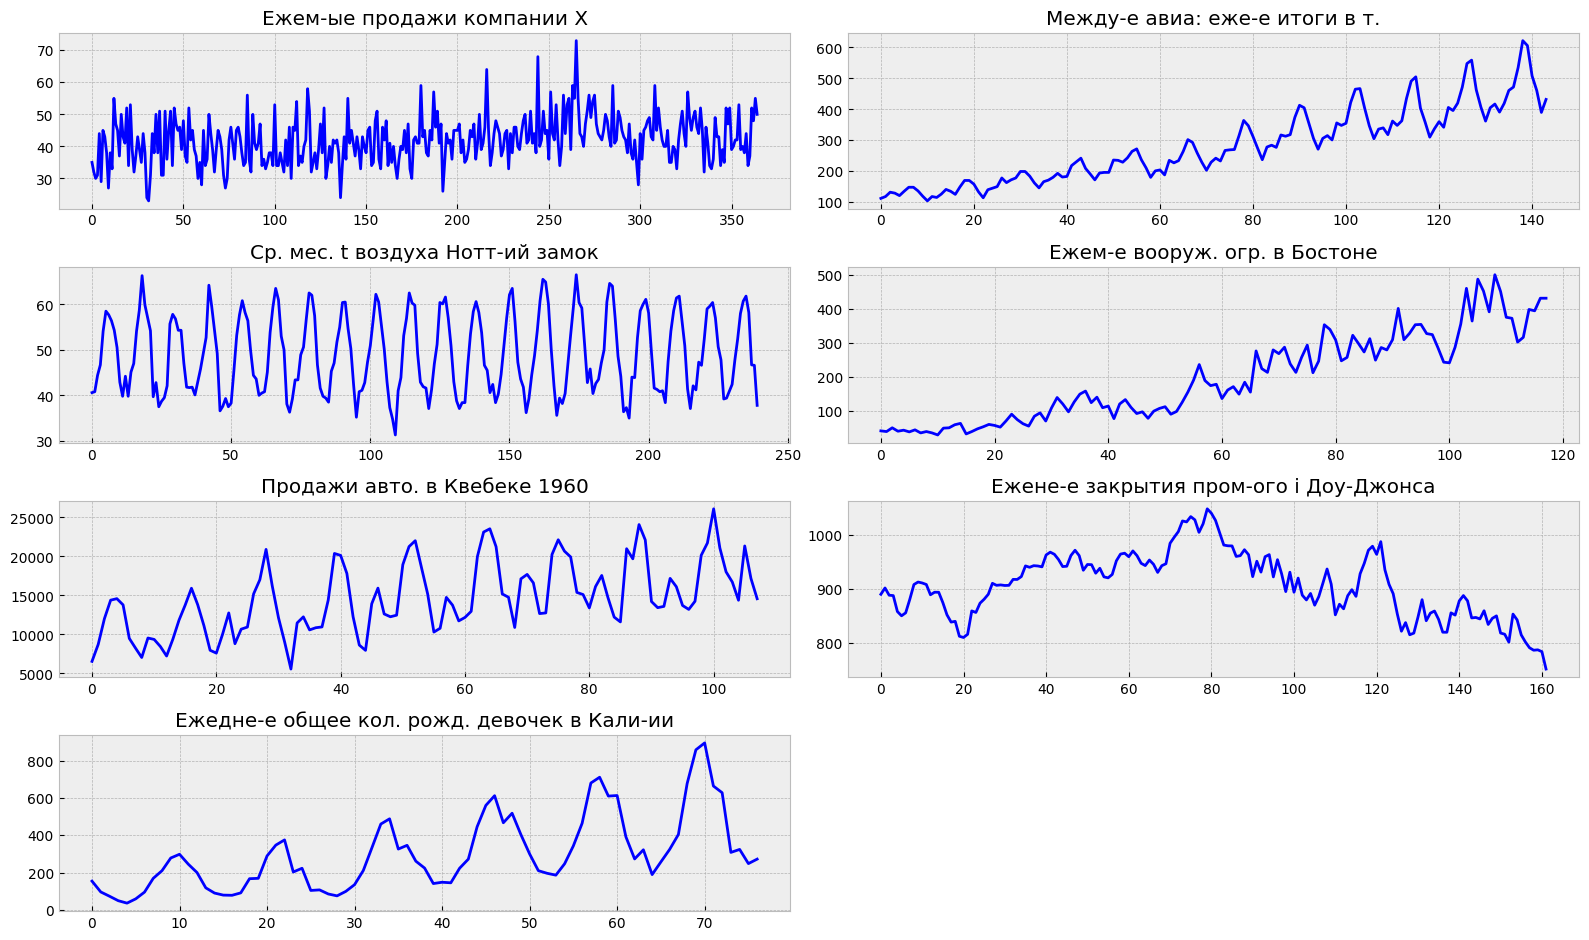

In [313]:
# Визуализация стационарных рядов
view_analyse(all_series)

In [314]:
def plot_ts_and_points(ts, start_point, step):
    new_series = [None for _ in range(len(ts))]
    for i in range(len(ts)):
        pos = start_point + step * i
        if pos >= len(ts):
            break
        new_series[pos] = ts[pos]
    new_series = pd.Series(new_series)

    with plt.style.context('bmh'):
        plt.figure(figsize=(16, 2))
        ts_ax = plt.axes()
        ts.plot(ax=ts_ax, color='blue')
        new_series.plot(ax=ts_ax, style='ro')
        plt.show()

## Поиск сезонности

Визуализация временного ряда для Ежем-ые продажи компании X


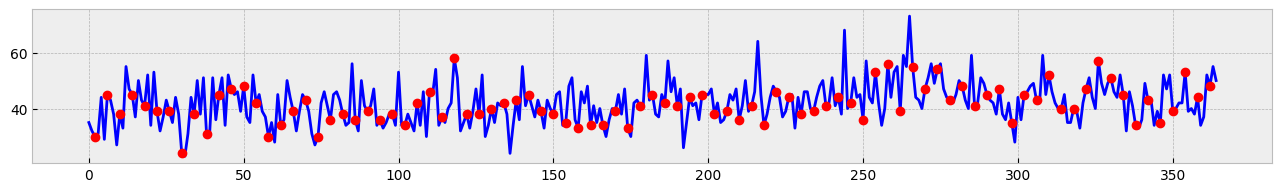

Визуализация временного ряда для Между-е авиа: еже-е итоги в т.


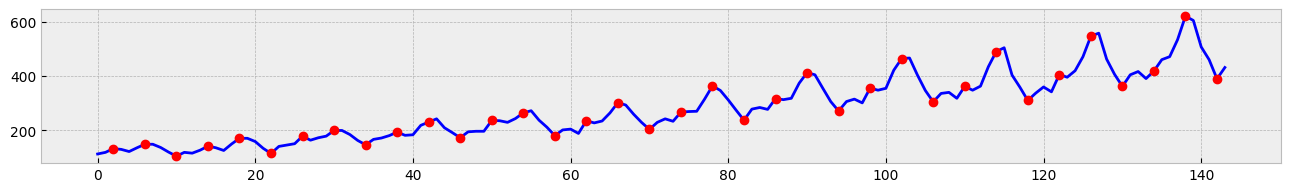

Визуализация временного ряда для Ср. мес. t воздуха Нотт-ий замок


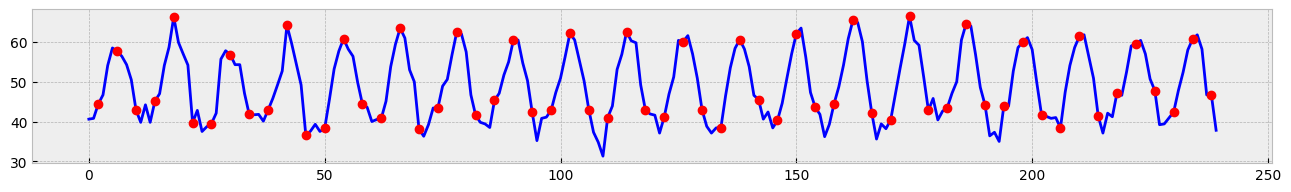

Визуализация временного ряда для Ежем-е вооруж. огр. в Бостоне


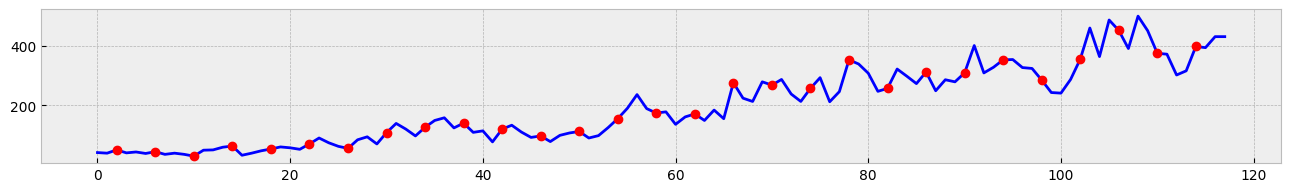

Визуализация временного ряда для Продажи авто. в Квебеке 1960


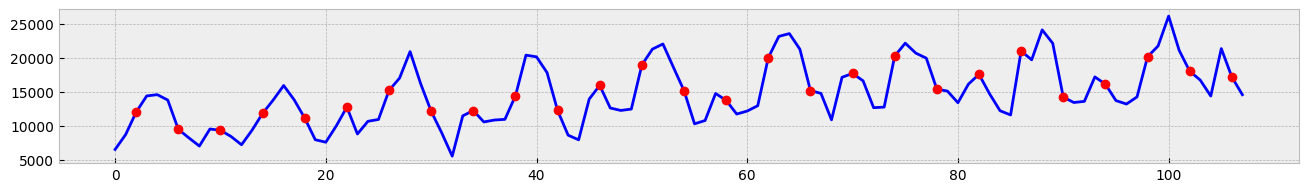

Визуализация временного ряда для Ежене-е закрытия пром-ого i Доу-Джонса


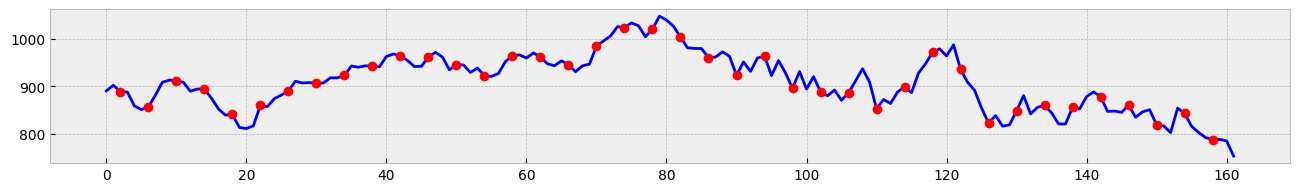

Визуализация временного ряда для Ежедне-е общее кол. рожд. девочек в Кали-ии


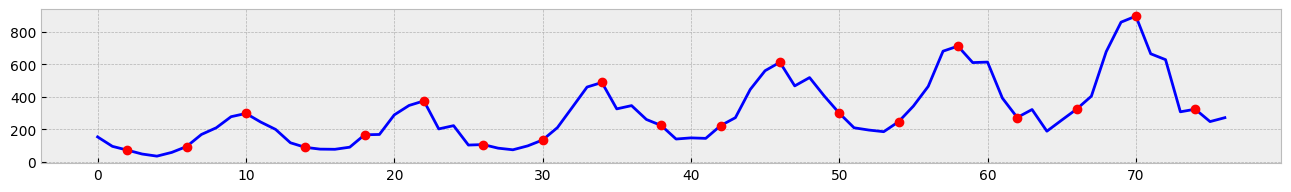

In [315]:
for name, series in all_series.items():
    print(f"Визуализация временного ряда для {name}")
    plot_ts_and_points(series, 2, 4)

## # Коррелограммы (одна для примера)

In [316]:
import statsmodels.api as sm
import statsmodels.tsa.api as smt

def tsplot(name, y, lags=None, figsize=(14, 8), style='bmh'):
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
    with plt.style.context(style):
        plt.figure(figsize=figsize)
        layout = (4, 1)
        ts_ax = plt.subplot2grid(layout, (0, 0), rowspan=2)
        acf_ax = plt.subplot2grid(layout, (2, 0))
        pacf_ax = plt.subplot2grid(layout, (3, 0))

        y.plot(ax=ts_ax, color='blue', label='Or')
        ts_ax.set_title('Original')

        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax, alpha=0.05)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax, alpha=0.05)
        print(f"Визуализация временного ряда для {name}")
        plt.tight_layout()
    return

Визуализация временного ряда для Ежем-ые продажи компании X

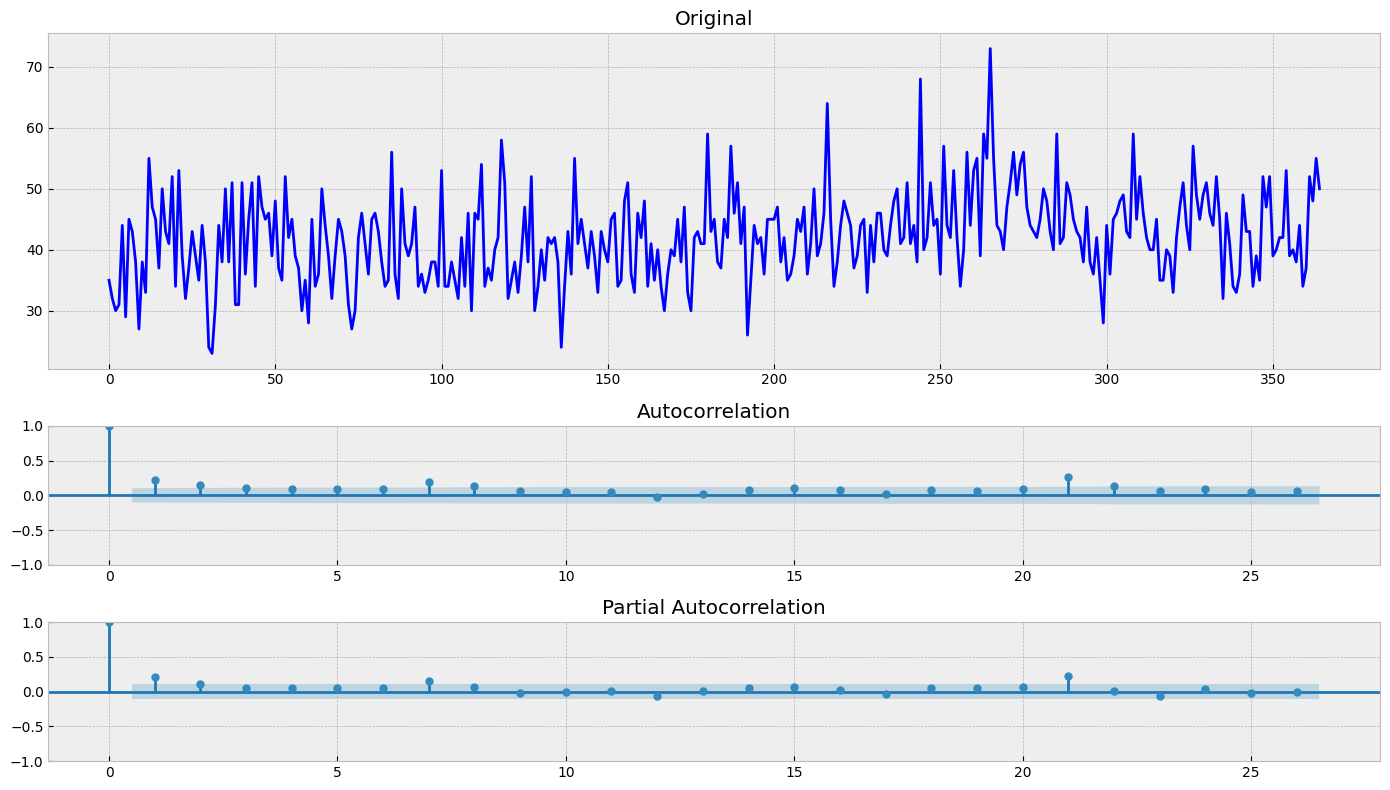

In [317]:
for name, series in all_series.items():
    tsplot(name, series)
    break

тест Дики-Фуллера

In [318]:
from statsmodels.tsa.stattools import adfuller

# Функция для проверки стационарности
def test_stationarity(timeseries, name):
    result = adfuller(timeseries)
    print(f"Проверка стационарности для {name}:")
    print(f'ADF статистика: {result[0]}')
    print(f'p-значение: {result[1]}')
    for key, value in result[4].items():
        print(f'Критическое значение {key}: {value}')
    print("\n")
    return result

In [319]:
# Проверка и преобразование временных рядов
stationary_series = {}
original_series = {}

for name, series in all_series.items():
    result = test_stationarity(series, name)
    if result[1] > 0.05:  # если p-value > 0.05, ряд нестационарный
        original_series[name] = series
        series_diff = series.diff().dropna()  # Применяем разность
        diff_result = test_stationarity(series_diff, f"дифференцированный {name}")
        while diff_result[1] > 0.05:  # Повторяем до тех пор, пока ряд не станет стационарным
            series_diff = series_diff.diff().dropna()
            diff_result = test_stationarity(series_diff, f"дополнительно дифференцированный {name}")
        stationary_series[name] = series_diff
    else:
        stationary_series[name] = series

# Удаление дубликатов, чтобы не было двух одинаковых рядов (оригинальный и стационарный)
for name, series in stationary_series.items():
    if name in original_series and stationary_series[name].equals(original_series[name]):
        del original_series[name]


Проверка стационарности для Ежем-ые продажи компании X:
ADF статистика: -4.808291253559763
p-значение: 5.243412990149865e-05
Критическое значение 1%: -3.448748905151901
Критическое значение 5%: -2.8696473721448728
Критическое значение 10%: -2.5710891239349585


Проверка стационарности для Между-е авиа: еже-е итоги в т.:
ADF статистика: 0.8153688792060482
p-значение: 0.991880243437641
Критическое значение 1%: -3.4816817173418295
Критическое значение 5%: -2.8840418343195267
Критическое значение 10%: -2.578770059171598


Проверка стационарности для дифференцированный Между-е авиа: еже-е итоги в т.:
ADF статистика: -2.8292668241699994
p-значение: 0.0542132902838255
Критическое значение 1%: -3.4816817173418295
Критическое значение 5%: -2.8840418343195267
Критическое значение 10%: -2.578770059171598


Проверка стационарности для дополнительно дифференцированный Между-е авиа: еже-е итоги в т.:
ADF статистика: -16.384231542468505
p-значение: 2.7328918500142407e-29
Критическое значение 1%: -3.4

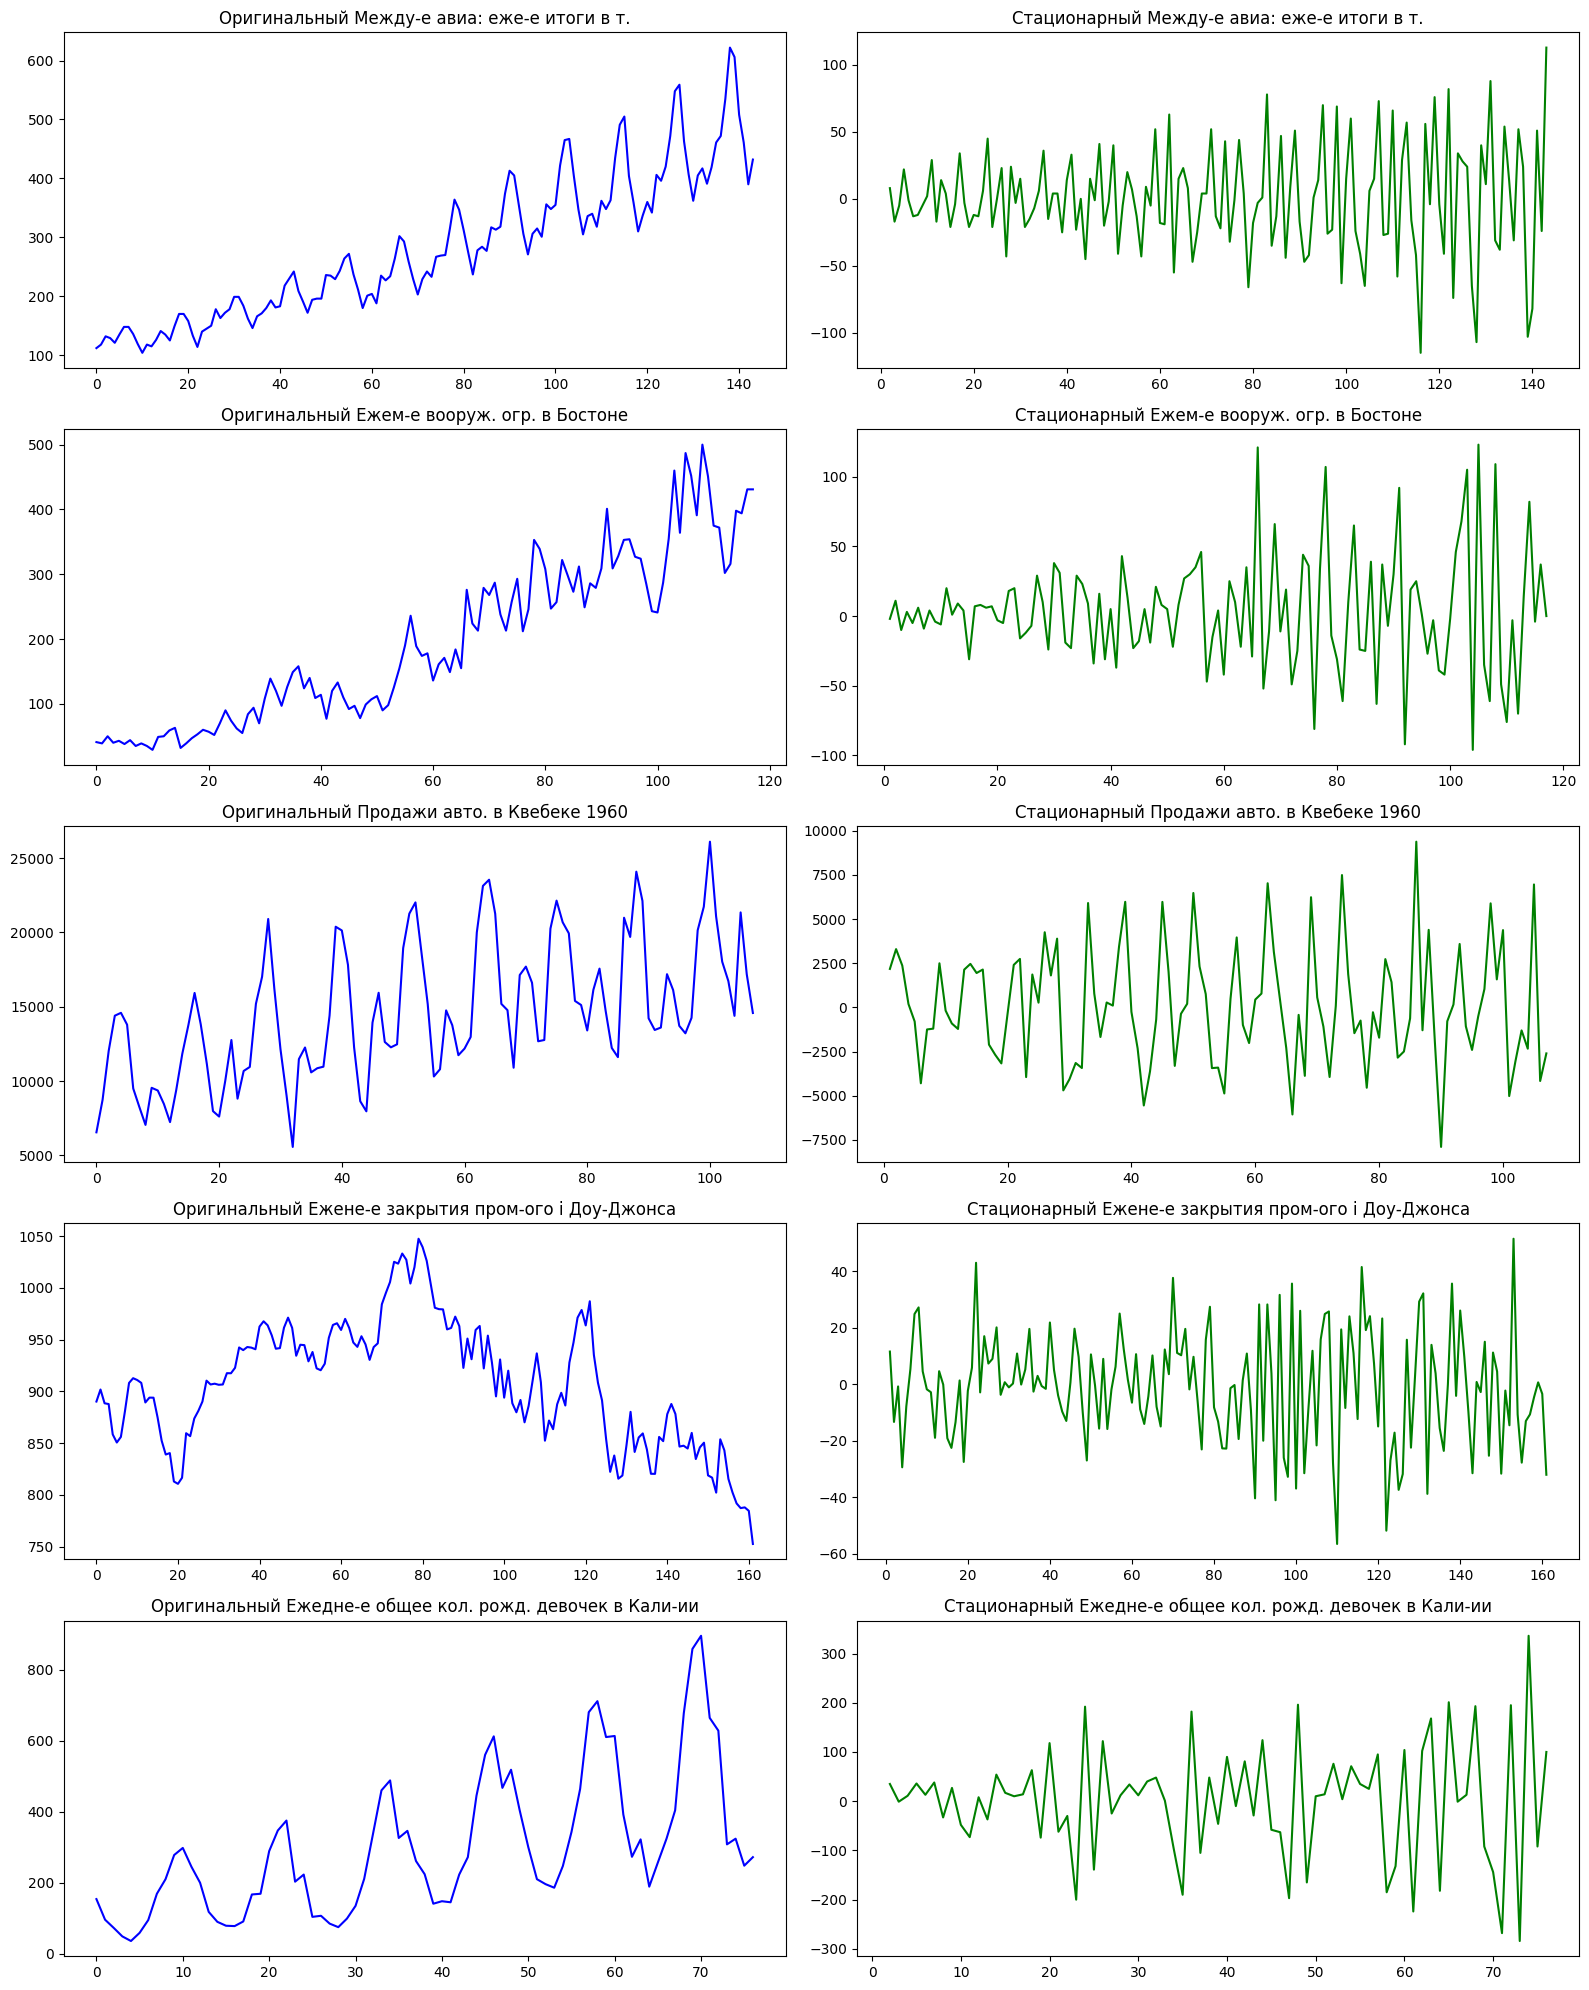

In [320]:
# Визуализация временных рядов (оригинальные и стационарные попарно)
num_pairs = len(original_series)
fig, axes = plt.subplots(num_pairs, 2, figsize=(16, num_pairs * 4))

for i, (name, series) in enumerate(original_series.items()):
    # Оригинальный ряд
    axes[i, 0].plot(series, color='blue')
    axes[i, 0].set_title(f"Оригинальный {name}")

    # Стационарный ряд
    if name in stationary_series:
        axes[i, 1].plot(stationary_series[name], color='green')
        axes[i, 1].set_title(f"Стационарный {name}")

plt.tight_layout()
plt.show()

## Вывод
+ была проделана следующая работа:
  + загружены данные
  + проведен визуальный анализ
  + поиск сезонности, у всех временных рядов одинаковые параметры (в учебных целях, для детального анализа, необходимо больше погружения)
  + сформирована `Коррелограмма`, для одного временного ряда
  + проведен тест `Дики-Фуллера`, для всех временных рядов и для тех у которых определены признаки не стационарного временного ряда, проведена работа для их стационарности
  + результат выведен для анализа
  + Изначально только один временной ряд был стационарным это - "Ср. мес. t воздуха Нотт-ий замок":`mean_monthly_temp`